<a href="https://colab.research.google.com/github/aysharega/AI-in-Cyber-Security/blob/main/CAPTCHA_Recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[CAPTCHA Recognition using CNN Gitlink](https://github.com/SIDD58/Captcha-recognition-using-CNN)

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#importing libraries
import numpy as np 

%matplotlib inline 
#to use as command line calls #using inline graphs will come next to code

import matplotlib.pyplot as plt #for graphs
import os #for operating system dependent fucntionality
from keras import layers #for building layers of neural net
from keras.models import Model
from keras.models import load_model
from keras import callbacks #for training logs, saving to disk periodically
import cv2 #OpenCV(Open Source computer vision lib), containg CV algos
import string

In [5]:
#print images in dataset
os.listdir("/content/drive/My Drive/captcha_dataset/samples")

['efg72.png',
 'xcmbp.png',
 'ny5dp.png',
 'x38fn.png',
 'wdww8.png',
 '6wb76.png',
 '373gb.png',
 'nb45d.png',
 'd75b5.png',
 '8ne4g.png',
 'fcey3.png',
 'fdpgd.png',
 '5bb66.png',
 '3eny7.png',
 'gymmn.png',
 '33p4e.png',
 'gnf85.png',
 '377xx.png',
 'gnbde.png',
 'wye85.png',
 'cx3wg.png',
 '34pcn.png',
 '4dgf7.png',
 'x44n4.png',
 '4exnn.png',
 'ndg2b.png',
 '5mgn4.png',
 'd2ycw.png',
 'cwmny.png',
 '65m85.png',
 'pdw38.png',
 'c8fxy.png',
 '55w5c.png',
 '3p67n.png',
 'exycn.png',
 '23mdg.png',
 '573bn.png',
 '2xc2n.png',
 'y5w28.png',
 'nbf8m.png',
 'gfbx6.png',
 'cffp4.png',
 'yf347.png',
 'x347n.png',
 'pmg55.png',
 '8n34n.png',
 'c6f8g.png',
 'nybcx.png',
 '7p852.png',
 'n5cm7.png',
 '7d44m.png',
 'c55c6.png',
 'dbex3.png',
 'fwxdp.png',
 'f4wfn.png',
 '57gnx.png',
 'c6745.png',
 'gc83b.png',
 'm4fd8.png',
 'x3deb.png',
 '47e4p.png',
 'wxcn8.png',
 'fpw76.png',
 'x775w.png',
 'cc845.png',
 'xdcn4.png',
 '8e32m.png',
 'ncw4g.png',
 'n4wwn.png',
 'f228n.png',
 'xc68n.png',
 'nw5b

In [6]:
#total no of images in dataset
n=len(os.listdir("/content/drive/My Drive/captcha_dataset/samples"))
n

1070

In [7]:
#defining size of image
imgshape=(50,200,1) #50-height, 200-width, 1-no of channels

In [8]:
character= string.ascii_lowercase + "0123456789" # All symbols captcha can contain
nchar = len(character) #total number of char possible
nchar

36

In [9]:
#preprocesss image
def preprocess():
  X = np.zeros((n,50,200,1)) #1070*50*200 array with all entries 0
  y = np.zeros((5,n,nchar)) #5*1070*36(5 letters in captcha) with all entries 0

  for i, pic in enumerate(os.listdir("/content/drive/My Drive/captcha_dataset/samples")):
  #i represents index no. of image in directory 
  #pic contains the file name of the particular image to be preprocessed at a time
    
    img = cv2.imread(os.path.join("/content/drive/My Drive/captcha_dataset/samples", pic), cv2.IMREAD_GRAYSCALE) #Read image in grayscale format
    pic_target = pic[:-4]#this drops the .png extension from file name and contains only the captcha for training
    
    if len(pic_target) < 6: #captcha is not more than 5 letters
      img = img / 255.0 #scales the image between 0 and 1
      img = np.reshape(img, (50, 200, 1)) #reshapes image to width 200 , height 50 ,channel 1 

      target=np.zeros((5,nchar)) #creates an array of size 5*36 with all entries 0

      for j, k in enumerate(pic_target):
      #j iterates from 0 to 4(5 letters in captcha)
      #k denotes the letter in captcha which is to be scanned
         index = character.find(k) #index stores the position of letter k of captcha in the character string
         target[j, index] = 1 #replaces 0 with 1 in the target array at the position of the letter in captcha

      X[i] = img #stores all the images
      y[:,i] = target #stores all the info about the letters in captcha of all images

  return X,y

In [10]:
#create model
def createmodel():
    img = layers.Input(shape=imgshape) # Get image as an input of size 50,200,1
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img) #50*200
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 25*100
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 13*50
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3) #to improve the stability of model
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 7*25
    
    flat = layers.Flatten()(mp3) #convert the layer into 1-D

    outs = []
    for _ in range(5): #for 5 letters of captcha
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1) #drops 0.5 fraction of nodes
        res = layers.Dense(nchar, activation='sigmoid')(drop)

        outs.append(res) #result of layers
    
    # Compile model and return it
    model = Model(img, outs) #create model
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [11]:
#Create model
model=createmodel();
model.summary();

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 200, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 50, 200, 16)  160         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 25, 100, 16)  0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 25, 100, 32)  4640        ['max_pooling2d[0][0]']      

In [12]:
X,y=preprocess()

In [13]:
#split the 1070 samples where 970 samples will be used for training purpose
X_train, y_train = X[:970], y[:, :970]
X_test, y_test = X[970:], y[:, 970:]

In [14]:
#Applying the model
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=60, validation_split=0.2)
#batch size- 32 defines no. of samples per gradient update
#Validation split=0.2 splits the training set in 80-20% for training nd testing

Epoch 1/60
25/25 [==============================] - 7s 218ms/step - loss: 17.6963 - dense_1_loss: 3.4947 - dense_3_loss: 3.5557 - dense_5_loss: 3.5662 - dense_7_loss: 3.5375 - dense_9_loss: 3.5421 - dense_1_accuracy: 0.0631 - dense_3_accuracy: 0.0451 - dense_5_accuracy: 0.0515 - dense_7_accuracy: 0.0387 - dense_9_accuracy: 0.0477 - val_loss: 17.7593 - val_dense_1_loss: 3.5487 - val_dense_3_loss: 3.5503 - val_dense_5_loss: 3.5573 - val_dense_7_loss: 3.5525 - val_dense_9_loss: 3.5505 - val_dense_1_accuracy: 0.0722 - val_dense_3_accuracy: 0.0670 - val_dense_5_accuracy: 0.0515 - val_dense_7_accuracy: 0.0773 - val_dense_9_accuracy: 0.0515
Epoch 2/60
25/25 [==============================] - 5s 198ms/step - loss: 16.5475 - dense_1_loss: 3.2343 - dense_3_loss: 3.3317 - dense_5_loss: 3.3419 - dense_7_loss: 3.3479 - dense_9_loss: 3.2917 - dense_1_accuracy: 0.0747 - dense_3_accuracy: 0.0683 - dense_5_accuracy: 0.0838 - dense_7_accuracy: 0.0567 - dense_9_accuracy: 0.0644 - val_loss: 17.6950 - val_

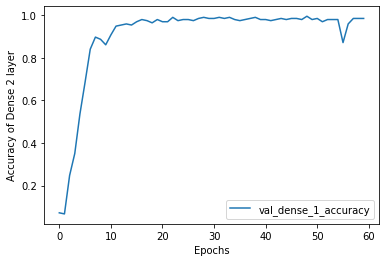

In [31]:
#graph of accuracy of dense_2 vs epochs
for label in ["val_dense_1_accuracy"]:
 plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 2 layer")
plt.show()

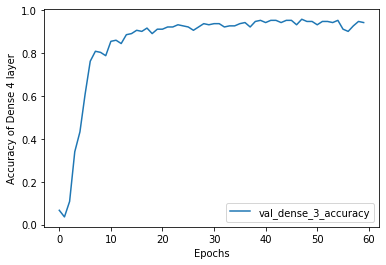

In [32]:
#graph of accuracy of dense_4 vs epochs
for label in ["val_dense_3_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 4 layer")
plt.show()

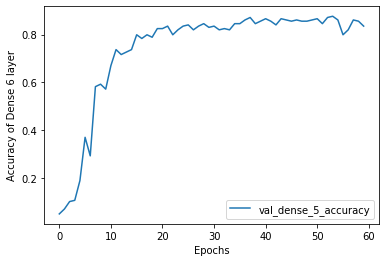

In [33]:
#graph of accuracy of dense_6 vs epochs
for label in ["val_dense_5_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 6 layer")
plt.show()

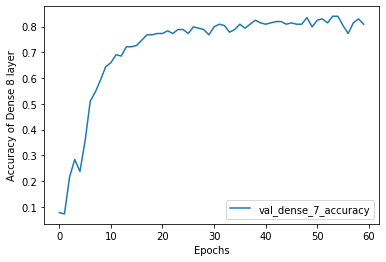

In [34]:
#graph of accuracy of dense_8 vs epochs
for label in ["val_dense_7_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 8 layer")
plt.show()

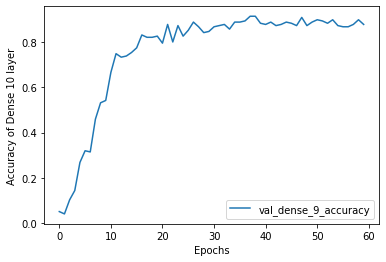

In [35]:
#graph of accuracy of dense_10 vs epochs
for label in ["val_dense_9_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 10 layer")
plt.show()

In [19]:
#Loss on training set
#Finding Loss on training set
preds = model.evaluate(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]])
print ("Loss on training set= " + str(preds[0]))

31/31 [==============================] - 2s 58ms/step - loss: 0.5112 - dense_1_loss: 0.0165 - dense_3_loss: 0.0773 - dense_5_loss: 0.1274 - dense_7_loss: 0.2278 - dense_9_loss: 0.0623 - dense_1_accuracy: 0.9959 - dense_3_accuracy: 0.9876 - dense_5_accuracy: 0.9649 - dense_7_accuracy: 0.9598 - dense_9_accuracy: 0.9742
Loss on training set= 0.5112058520317078


In [20]:
#Finding loss on test set
preds = model.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]])
print ("Loss on testing set= " + str(preds[0]))

4/4 [==============================] - 0s 43ms/step - loss: 1.9047 - dense_1_loss: 0.0058 - dense_3_loss: 0.2088 - dense_5_loss: 0.5230 - dense_7_loss: 0.7234 - dense_9_loss: 0.4436 - dense_1_accuracy: 1.0000 - dense_3_accuracy: 0.9500 - dense_5_accuracy: 0.8500 - dense_7_accuracy: 0.8300 - dense_9_accuracy: 0.8800
Loss on testing set= 1.9046618938446045


In [21]:
#to predict captcha
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

    if img is not None: #image foud at file path
        img = img / 255.0 #Scale image
    else:
        print("Not detected");

    res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis])) #np.newaxis=1 
    #added this bcoz x_train 970*50*200*1
    #returns array of size 1*5*36 
    result = np.reshape(res, (5, 36)) #reshape the array
    k_ind = []
    probs = []
    for i in result:
        k_ind.append(np.argmax(i)) #adds the index of the char found in captcha

    capt = '' #string to store predicted captcha
    for k in k_ind:
        capt += character[k] #finds the char corresponding to the index
    return capt 

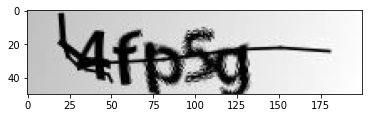

In [24]:
#Check model on samples
img=cv2.imread('/content/drive/My Drive/captcha_dataset/4fp5g.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [27]:
print("Predicted Captcha =",predict('/content/drive/My Drive/captcha_dataset/4fp5g.png'))

Predicted Captcha = 4fp5g


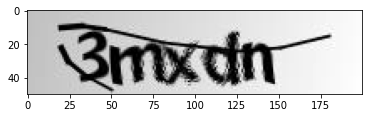

In [28]:
#Sample 2
img=cv2.imread('/content/drive/My Drive/captcha_dataset/3mxdn.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [29]:
print("Predicted Captcha =",predict('/content/drive/My Drive/captcha_dataset/3mxdn.png'))

Predicted Captcha = 3mxdn
